# SF Salaries Exercise

** Import pandas as pd.**

In [ ]:
import pandas as pd

** Read Salaries.csv as a dataframe called sal.**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Kokkalo4/Kaggle-SF-Salaries/master/Salaries.csv", low_memory=False)

** Check the head of the DataFrame. **

In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [ ]:
# prompt: Convert BasePay from object to int and find the average of base pay.

df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
avg_basepay = df['BasePay'].mean()
print(avg_basepay)


66325.4488404877


** What is the highest amount of OvertimePay in the dataset ? **

In [ ]:
# prompt: Find the highest OvertimePay

df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
highest_overtime = df['OvertimePay'].max()
print(highest_overtime)


245131.88


** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
# prompt: Find the JobTitle of EmployeeName JOSEPH DRISCOLL.

joseph_driscoll = df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle'].values[0]
print(joseph_driscoll)


CAPTAIN, FIRE SUPPRESSION


** How much does JOSEPH DRISCOLL make (including benefits)? **

In [ ]:
# prompt: Find how much does EmployeeName JOSEPH DRISCOLL makes from TotalPayBenefits

joseph_driscoll_total_pay = df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits'].values[0]
print(joseph_driscoll_total_pay)


270324.91


** What is the name of highest paid person (including benefits)?**

In [ ]:
# prompt: Find the EmployeeName who makes highest TotalPayBenefits.

highest_paid = df.loc[df['TotalPayBenefits'].idxmax()]
print(highest_paid['EmployeeName'])


NATHANIEL FORD


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [ ]:
# prompt: Find EmployeeName with lowest TotalPayBenefits

lowest_paid = df.loc[df['TotalPayBenefits'].idxmin()]
print(lowest_paid['EmployeeName'])


Joe Lopez


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [ ]:
# prompt: Find the average BasePay of all between the Year 2011-2014 use the above dataframe

# Filter the DataFrame for the years 2011-2014
filtered_df = df[(df['Year'] >= 2011) & (df['Year'] <= 2014)]

# Calculate the average BasePay per year
average_basepay_per_year = filtered_df.groupby('Year')['BasePay'].mean()

print(average_basepay_per_year)


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


** How many unique job titles are there? **

In [ ]:
# prompt: find the count of unique JobTitle

unique_job_titles = df['JobTitle'].nunique()
print(unique_job_titles)


2159


** What are the top 5 most common jobs? **

In [ ]:
# prompt: Find the top 5 most common JobTitle

top_5_jobs = df['JobTitle'].value_counts().head(5)
print(top_5_jobs)


JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


** Plot the distribution of the basePay  **

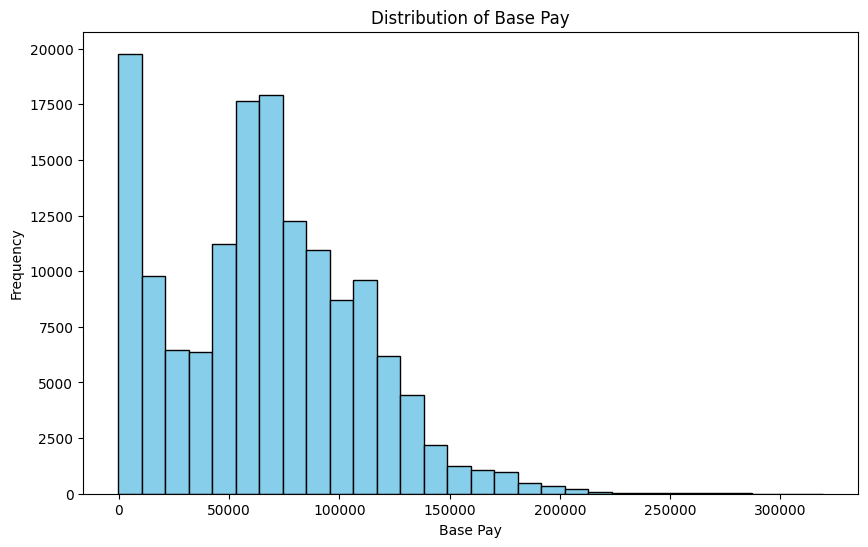

In [ ]:
# prompt: generate a plot to see the distribution of BasePay

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Base Pay')
plt.xlabel('Base Pay')
plt.ylabel('Frequency')
plt.show()


** Plot a piechart of the job status (full time / part time / not mentioned)  **

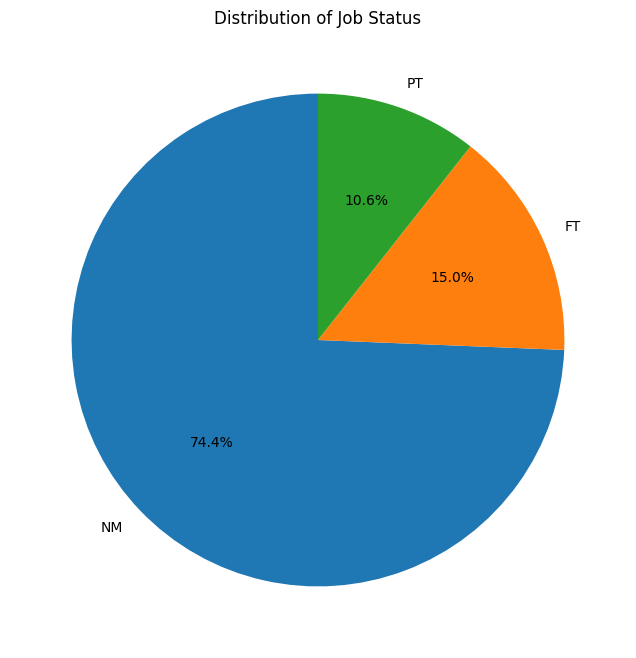

In [ ]:
# prompt: Fill null values in Status to NM and now plot a pie chart for status


import matplotlib.pyplot as plt

# Fill null values in 'Status' with 'NM'
df['Status'].fillna('NM', inplace=True)

# Count the occurrences of each job status
status_counts = df['Status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Status')
plt.show()
